# Real QCNN Loss History

In [1]:
from pennylane import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import sys
sys.path.insert(0, '/Users/tak/Github/QEmbedding/')
import Hybrid_nn
import torch
from torch import nn
import data
import pennylane as qml
import embedding

# QCNN Loss History

In [10]:
PATH_Model2 = '/Users/tak/Github/QEmbedding/Results/QCNN_demonstration/Real device/Real/Model2 pre-train/Model2_48.pt'
PATH_Model3 = '/Users/tak/Github/QEmbedding/Results/QCNN_demonstration/Real device/Real/Model3 pre-train/Model3_48.pt'

PATH_LH0_Jakarta = '/Users/tak/Github/QEmbedding/Results/QCNN_demonstration/Real device/Real/QCNN train (Jakarta)/Model0/Loss_not_trained.txt'
PATH_LH2_Jakarta = '/Users/tak/Github/QEmbedding/Results/QCNN_demonstration/Real device/Real/QCNN train (Jakarta)/Model2/Loss_Model2.txt'
PATH_LH3_Jakarta = '/Users/tak/Github/QEmbedding/Results/QCNN_demonstration/Real device/Real/QCNN train (Jakarta)/Model3/Loss_Model3.txt'

PATH_LH0_Perth = '/Users/tak/Github/QEmbedding/Results/QCNN_demonstration/Real device/Real/QCNN train (Perth)/Model0/Loss_not_trained.txt'
PATH_LH2_Perth = '/Users/tak/Github/QEmbedding/Results/QCNN_demonstration/Real device/Real/QCNN train (Perth)/Model2/Loss_Model2.txt'
PATH_LH3_Perth = '/Users/tak/Github/QEmbedding/Results/QCNN_demonstration/Real device/Real/QCNN train (Perth)/Model3/Loss_Model3.txt'

PATH_LH0_Toronto = '/Users/tak/Github/QEmbedding/Results/QCNN_demonstration/Real device/Real/QCNN train (Toronto)/Model0/Loss_not_trained.txt'
PATH_LH2_Toronto = '/Users/tak/Github/QEmbedding/Results/QCNN_demonstration/Real device/Real/QCNN train (Toronto)/Model2/Loss_Model2.txt'
PATH_LH3_Toronto = '/Users/tak/Github/QEmbedding/Results/QCNN_demonstration/Real device/Real/QCNN train (Toronto)/Model3/Loss_Model3.txt'

PATH_w0_Jakarta = '/Users/tak/Github/QEmbedding/Results/QCNN_demonstration/Real device/Real/QCNN train (Jakarta)/Model0/weights_not_trained.txt'
PATH_w2_Jakarta = '/Users/tak/Github/QEmbedding/Results/QCNN_demonstration/Real device/Real/QCNN train (Jakarta)/Model2/weights_Model2.txt'
PATH_w3_Jakarta = '/Users/tak/Github/QEmbedding/Results/QCNN_demonstration/Real device/Real/QCNN train (Jakarta)/Model3/weights_Model3.txt'

PATH_w0_Perth = '/Users/tak/Github/QEmbedding/Results/QCNN_demonstration/Real device/Real/QCNN train (Perth)/Model0/weights_not_trained.txt'
PATH_w2_Perth = '/Users/tak/Github/QEmbedding/Results/QCNN_demonstration/Real device/Real/QCNN train (Perth)/Model2/weights_Model2.txt'
PATH_w3_Perth = '/Users/tak/Github/QEmbedding/Results/QCNN_demonstration/Real device/Real/QCNN train (Perth)/Model3/weights_Model3.txt'

PATH_w0_Toronto = '/Users/tak/Github/QEmbedding/Results/QCNN_demonstration/Real device/Real/QCNN train (Toronto)/Model0/weights_not_trained.txt'
PATH_w2_Toronto = '/Users/tak/Github/QEmbedding/Results/QCNN_demonstration/Real device/Real/QCNN train (Toronto)/Model2/weights_Model2.txt'
PATH_w3_Toronto = '/Users/tak/Github/QEmbedding/Results/QCNN_demonstration/Real device/Real/QCNN train (Toronto)/Model3/weights_Model3.txt'

def data_read(PATH):
  textfile = open(PATH, 'r')
  data = np.array([])
  for line in textfile:
    a = np.array([float(v) for v in line.strip().split(" ")])
    data = np.append(data, a)
  return data

Loss_histories0_Jakarta = data_read(PATH_LH0_Jakarta)
Loss_histories2_Jakarta = data_read(PATH_LH2_Jakarta)
Loss_histories3_Jakarta = data_read(PATH_LH3_Jakarta)

Loss_histories0_Perth = data_read(PATH_LH0_Perth)
Loss_histories2_Perth = data_read(PATH_LH2_Perth)
Loss_histories3_Perth = data_read(PATH_LH3_Perth)

Loss_histories0_Toronto = data_read(PATH_LH0_Toronto)
Loss_histories2_Toronto = data_read(PATH_LH2_Toronto)
Loss_histories3_Toronto = data_read(PATH_LH3_Toronto)

weights_histories0_Jakarta = data_read(PATH_w0_Jakarta).reshape(50,4)
weights_histories2_Jakarta = data_read(PATH_w2_Jakarta).reshape(50,4)
weights_histories3_Jakarta = data_read(PATH_w3_Jakarta).reshape(50,4)

weights_histories0_Perth = data_read(PATH_w0_Perth).reshape(50,4)
weights_histories2_Perth = data_read(PATH_w2_Perth).reshape(50,4)
weights_histories3_Perth = data_read(PATH_w3_Perth).reshape(50,4)

weights_histories0_Toronto = data_read(PATH_w0_Toronto).reshape(50,4)
weights_histories2_Toronto = data_read(PATH_w2_Toronto).reshape(50,4)
weights_histories3_Toronto = data_read(PATH_w3_Toronto).reshape(50,4)

Loss_histories0 = np.array([Loss_histories0_Jakarta, Loss_histories0_Perth, Loss_histories0_Toronto])
Loss_histories2 = np.array([Loss_histories2_Jakarta, Loss_histories2_Perth, Loss_histories2_Toronto])
Loss_histories3 = np.array([Loss_histories3_Jakarta, Loss_histories3_Perth, Loss_histories3_Toronto])

LH0_mean, LH0_std = Loss_histories0.mean(axis=0), Loss_histories0.std(axis=0)
LH2_mean, LH2_std = Loss_histories2.mean(axis=0), Loss_histories2.std(axis=0)
LH3_mean, LH3_std = Loss_histories3.mean(axis=0), Loss_histories3.std(axis=0)

accuracies_model0 = np.array([0.528, 0.486, 0.566])
accuracies_model2 = np.array([0.964, 0.964, 0.954])
accuracies_model3 = np.array([0.92,  0.846, 0.954])

In [11]:
LB_before_traindata = 0.5 * (1 - 0.2734)
LB_Model2_traindata = 0.5 * (1 - 0.84026)
LB_Model3_traindata = 0.5 * (1 - 0.79202)

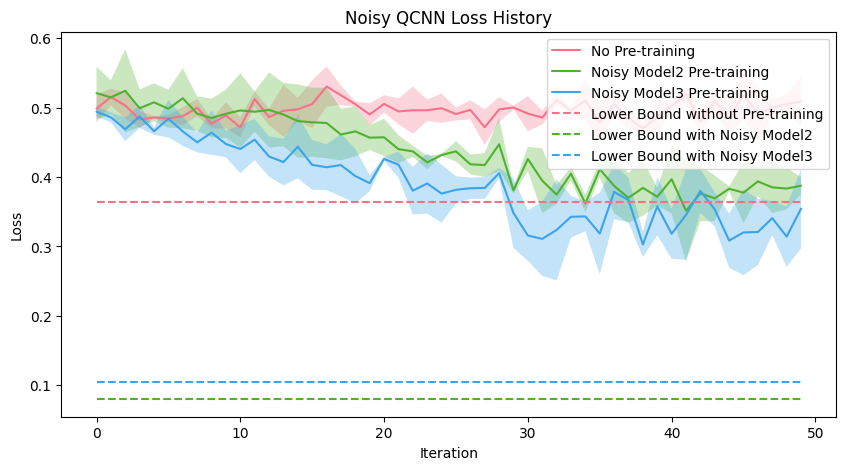

In [12]:
import seaborn as sns

plt.rcParams['figure.figsize'] = [10, 5]
fig, ax = plt.subplots()
clrs = sns.color_palette("husl", 3)
with sns.axes_style("darkgrid"):
    ax.plot(range(len(LH0_mean)), LH0_mean, label="No Pre-training", c=clrs[0])
    ax.fill_between(range(len(LH0_mean)), LH0_mean-LH0_std, LH0_mean+LH0_std, alpha=0.3,facecolor=clrs[0])
    
    ax.plot(range(len(LH2_mean)), LH2_mean, label="Noisy Model2 Pre-training", c=clrs[1])
    ax.fill_between(range(len(LH2_mean)), LH2_mean-LH2_std, LH2_mean+LH2_std, alpha=0.3,facecolor=clrs[1])

    ax.plot(range(len(LH3_mean)), LH3_mean, label="Noisy Model3 Pre-training", c=clrs[2])
    ax.fill_between(range(len(LH3_mean)),LH3_mean-LH3_std, LH3_mean+LH3_std, alpha=0.3,facecolor=clrs[2])


    ax.plot(range(50), np.ones(50) * LB_before_traindata, linestyle='dashed', linewidth=1.5, label="Lower Bound without Pre-training", c=clrs[0])
    ax.plot(range(50), np.ones(50) * LB_Model2_traindata, linestyle='dashed', linewidth=1.5, label="Lower Bound with Noisy Model2", c=clrs[1])
    ax.plot(range(50), np.ones(50) * LB_Model3_traindata, linestyle='dashed', linewidth=1.5, label="Lower Bound with Noisy Model3", c=clrs[2])


ax.set_xlabel("Iteration")
ax.set_ylabel("Loss")
ax.set_title("Noisy QCNN Loss History")
ax.legend()

In [14]:
print("QCNN Accuracy\n")
print("---------------------")
print(f"Without NQE: {accuracies_model0.mean()} ± {accuracies_model0.std()}")
print(f"Model2: {accuracies_model2.mean()} ± {accuracies_model2.std()}")
print(f"Model3: {accuracies_model3.mean()} ± {accuracies_model3.std()}")

QCNN Accuracy

---------------------
Without NQE: 0.5266666666666667 ± 0.03267346867958091
Model2: 0.9606666666666666 ± 0.004714045207910321
Model3: 0.9066666666666666 ± 0.04508756911709578
